<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/RENDEMENT_DES_ACTIONS_MICROSOFT_APPLE_GOOGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce projet, nous allons calculer la probabilité que le prix de l'action baisse d'un certain pourcentage en un jour et en un an. Et calculer le risque de perte.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplolib inline

UsageError: Line magic function `%` not found.


Importer les données

In [ ]:
# Apple
app = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1549756800&period2=1707523200&interval=1d&events=history&includeAdjustedClose=true")

# microsoft
ms = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1549756800&period2=1707523200&interval=1d&events=history&includeAdjustedClose=true")

# google
goog = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1549756800&period2=1707523200&interval=1d&events=history&includeAdjustedClose=true")

In [ ]:
app.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-11,42.762501,42.802502,42.312500,42.357498,40.777519,83973600
1,2019-02-12,42.525002,42.750000,42.424999,42.722500,41.128902,89134000


In [ ]:
ms.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-11,106.199997,106.580002,104.970001,105.250000,99.945091,18914100
1,2019-02-12,106.139999,107.139999,105.480003,106.889999,101.502441,25056600


In [ ]:
goog.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-11,54.8475,55.297249,54.643002,54.750500,54.750500,21304000
1,2019-02-12,55.3400,56.264751,55.292500,56.068501,56.068501,32182000


Cherchons la distribution logarithmique du retour journalier de chaque action.

In [ ]:

# microsoft
ms["logreturn"] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

# Apple
app["logreturn"] = np.log(app['Close']).shift(-1) - np.log(app['Close'])

# google
goog["logreturn"] = np.log(goog['Close']).shift(-1) - np.log(goog['Close'])


Traçons un histogramme pour montrer la distribution du retour du journal des actions de Microsoft, pour voir la distribution. Cette distribution sera proche d'une distribution normale pour les trois actions.

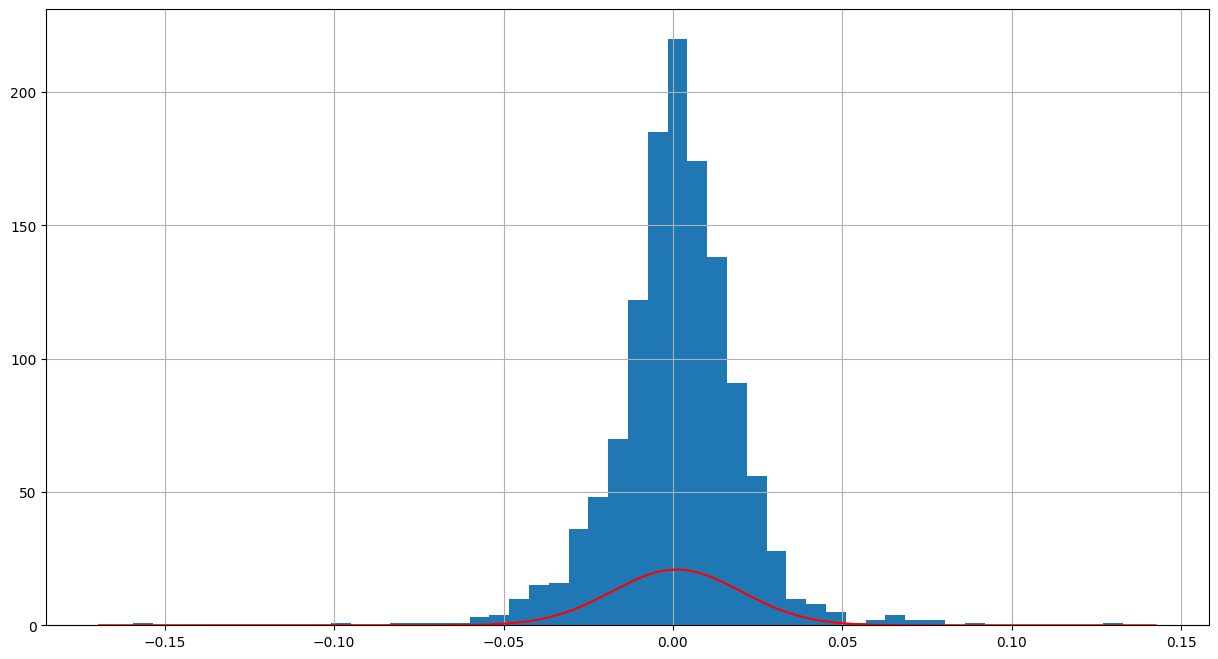

In [ ]:
# microsoft
from scipy.stats import norm
# la moyenne de logreturn
mu_ms = ms['logreturn'].mean()
sigma_ms = ms['logreturn'].std(ddof = 1)

# calculons la densité
densite = pd.DataFrame()
densite['x'] = np.arange(ms['logreturn'].min()-0.01, ms['logreturn'].max()+0.01, 0.001)
densite['pdf'] = norm.pdf(densite['x'], mu_ms, sigma_ms)

#représentation graphique
ms['logreturn'].hist(bins=50, figsize=(15, 8))
plt.plot(densite['x'], densite['pdf'], color='red')
plt.show()


Pour apple on aura la même distribution

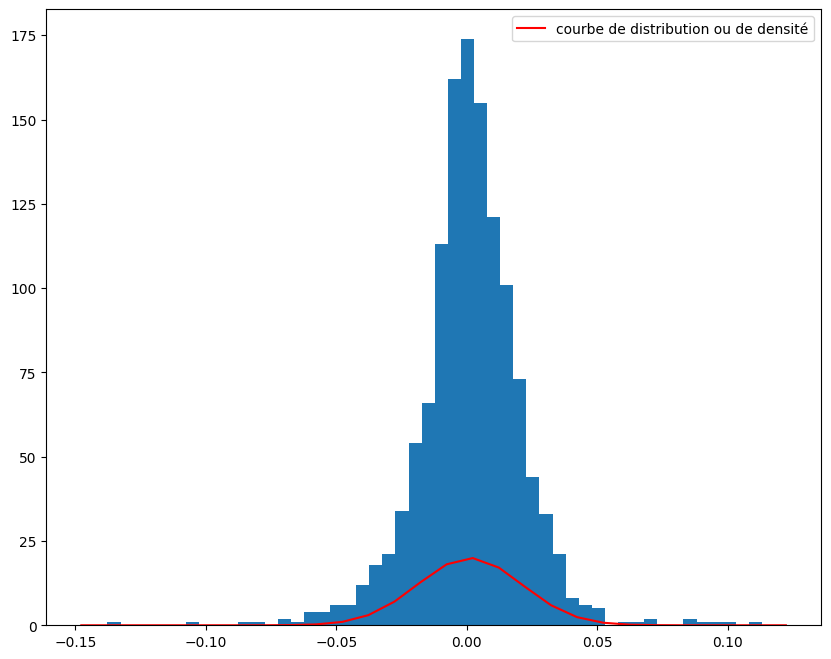

In [ ]:
# apple
# la moyenne
mu_app = app['logreturn'].mean()
sigma_app = app['logreturn'].std(ddof = 1)

# calculons la densité
densite_app = pd.DataFrame()
densite_app["X"] = np.arange(app['logreturn'].min() - 0.01, app['logreturn'].max() + 0.01, 0.01)
densite_app["pdf"] = norm.pdf(densite_app["X"], mu_app, sigma_app)

# représentation graphique

plt.figure(figsize = (10, 8))
plt.hist(app['logreturn'], bins=50)
plt.plot(densite_app['X'], densite_app["pdf"], color = "red", label = "courbe de distribution ou de densité")
plt.legend()
plt.show()

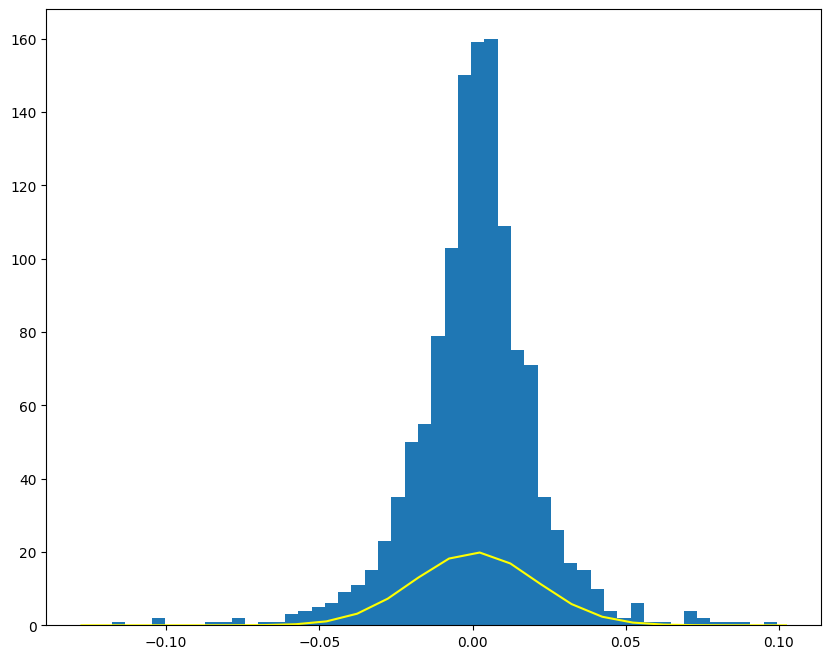

In [ ]:
# google

# la moyenne
mu_gg = goog['logreturn'].mean()
sigma_gg = goog['logreturn'].std(ddof = 1)

# calculons la densité
densite_g = pd.DataFrame()
densite_g["x"] = np.arange(goog['logreturn'].min()-0.01, goog["logreturn"].max()+0.01, 0.01)
densite_g["pdf"] = norm.pdf(densite_g["x"], mu_gg, sigma_gg)

# représentation graphique
plt.figure(figsize = (10, 8))
plt.hist(goog['logreturn'], bins=50)
plt.plot(densite_g['x'], densite_g['pdf'], label= "courbe de densité", color = "yellow")

Calculer la probabilité que le cours de l'action baisse d'un certain pourcentage en une journée

* **Quelle est la probabilité que le cours de l'action Microsoft, apple et google chute de plus de 5 % en une journée ? **

In [ ]:
# microsoft
prob_return1 = norm.cdf(-0.05, mu_ms, sigma_ms)
print("La probabilité que l'action microsoft chute de plus de 5% en une journée est : ", (prob_return1)*100)

La probabilité que l'action microsoft chute de plus de 5% en une journée est :  0.3744323382821357


In [ ]:
# apple
prob_return_app = norm.cdf(-0.05, mu_app, sigma_app)
print("La probabilité que l'action apple chute de plus de 5% en une journée est :", (prob_return_app)*100)

La probabilité que l'action apple chute de plus de 5% en une journée est : 0.5205496669466244


In [ ]:
# google
prob_return_gg = norm.cdf(-0.05, mu_gg, sigma_gg)
print("La probabilité que l'action google chute de plus de 5% en une journée est de :", (prob_return_gg)*100)

La probabilité que l'action google chute de plus de 5% en une journée est de : 0.5639771245727315


* **Calculons la probabilité de chutte de 10% **

In [ ]:
# microsoft
prob_return1 = norm.cdf(-0.1, mu_ms, sigma_ms)
print("La probabilité que l'action microsoft chute de plus de 10% en une journée est : ", (prob_return1)*100)

La probabilité que l'action microsoft chute de plus de 10% en une journée est :  6.083642831067883e-06


In [ ]:
# apple
prob_return_app = norm.cdf(-0.1, mu_app, sigma_app)
print("La probabilité que l'action apple chute de plus de 10% en une journée est :", (prob_return_app)*100)

La probabilité que l'action apple chute de plus de 10% en une journée est : 2.0498073056481098e-05


In [ ]:
# google
prob_return_gg = norm.cdf(-0.1, mu_gg, sigma_gg)
print("La probabilité que l'action google chute de plus de 10% en une journée est de :", (prob_return_gg)*100)

La probabilité que l'action google chute de plus de 10% en une journée est de : 2.4804853127393476e-05


Dans l'ensemble, pour les trois actions laprobabilité de chute de plus de 5 ou de 10% en une journée est moins probalbe car elle prèsque égale à 0. C'est un évenement rare cela peut se produire dans les périodes de crise économiques,sanitaire, dans les périodes de guerre, etc.

Quelle serait la probabilité que le cours des actions microsoft, apple et google baisse d'un certain pourcentage en un an ?

* **Baisse de plus de 40 % en 220 jours**



In [ ]:
# microsoft
mu_ms_220 = mu_ms*220
sigma_ms_220 =  (220**0.5)*sigma_ms
print("La probabilité que le prix de l'action de microsoft baisse de plus de 40% en 220 jours est :", (norm.cdf(-0.4, mu_ms_220, sigma_ms_220))*100)

La probabilité que le prix de l'action de microsoft baisse de plus de 40% en 220 jours est : 1.1723909568326398


In [ ]:
# apple
mu_app_220 = mu_app*220
sigma_app_220 = (220**0.5)*sigma_app
print("La probabilité que le prix de l'action d'Apple baisse de plus de 40% en 220 jours est :", (norm.cdf(-0.4, mu_app_220, sigma_app_220))*100)

La probabilité que le prix de l'action d'Apple baisse de plus de 40% en 220 jours est : 1.2815238543930818


In [ ]:
# googe
mu_gg_220 = mu_gg*220
sigma_gg_220 = (220**0.5)*sigma_gg
print("La probabilité que le prix de l'action google baisse de plus de 40% en 220 jours est :", (norm.cdf(-0.4, mu_gg_220, sigma_gg_220))*100)

La probabilité que le prix de l'action google baisse de plus de 40% en 220 jours est : 2.6270700237782734


**Baisse de plus de 20 % en 220 jours**

In [ ]:
# microsoft
mu_ms_220 = mu_ms*220
sigma_ms_220 =  (220**0.5)*sigma_ms
print("La probabilité que le prix de l'action de microsoft baisse de plus de 20% en 220 jours est :", (norm.cdf(-0.2, mu_ms_220, sigma_ms_220))*100)

La probabilité que le prix de l'action de microsoft baisse de plus de 20% en 220 jours est : 5.933328634833599


In [ ]:
# apple
mu_app_220 = mu_app*220
sigma_app_220 = (220**0.5)*sigma_app
print("La probabilité que le prix de l'action d'Apple baisse de plus de 20% en 220 jours est :", (norm.cdf(-0.2, mu_app_220, sigma_app_220))*100)

La probabilité que le prix de l'action d'Apple baisse de plus de 20% en 220 jours est : 5.974501424047777


In [ ]:
# googe
mu_gg_220 = mu_gg*220
sigma_gg_220 = (220**0.5)*sigma_gg
print("La probabilité que le prix de l'action google baisse de plus de 20% en 220 jours est :", (norm.cdf(-0.2, mu_gg_220, sigma_gg_220))*100)

La probabilité que le prix de l'action google baisse de plus de 20% en 220 jours est : 10.273568516824788


Cherchons la valeur à risque (VaR) de perdre de l'argent sur les actions microsoft, apple et google.

* **var**

In [ ]:
# microsoft
var_ms = norm.ppf(0.05, mu_ms, sigma_ms)
print("La valeur à risquer pour l'action microsoft en une journée est :", var_ms)

La valeur à risquer pour l'action microsoft en une journée est : -0.03032915925417964


In [ ]:
# apple
var_app = norm.ppf(0.05, mu_app, sigma_app)
print("La valeur à risquer pour l'action apple en une journée est :", var_app)

La valeur à risquer pour l'action apple en une journée est : -0.03167725394770321


In [ ]:
# google
var_gg = norm.ppf(0.05, mu_app, sigma_app)
print("La valeur à risquer pour l'action google en une journée est :", var_gg)

La valeur à risquer pour l'action google en une journée est : -0.03167725394770321


* **Les quatilles à 5% et à 95%**

In [ ]:
# microsoft
print('5% quantile est ', norm.ppf(0.05, mu_ms, sigma_ms))

print('95% quantile est ', norm.ppf(0.95, mu_ms, sigma_ms))


5% quantile est  -0.03032915925417964
95% quantile est  0.032531424559921904


In [ ]:
# apple
print('5% quantile est ', norm.ppf(0.05, mu_app, sigma_app))

print('95% quantile est ', norm.ppf(0.95, mu_app, sigma_app))

5% quantile est  -0.03167725394770321
95% quantile est  0.03405373666168846


In [ ]:
print('5% quantile est ', norm.ppf(0.05, mu_gg, sigma_gg))

print('95% quantile est ', norm.ppf(0.95, mu_gg, sigma_gg))

5% quantile est  -0.03217523261717943
95% quantile est  0.03377986599053358


Visualisation du retour journalier des trois actions

Text(0.5, 1.0, 'Retour journaliser de microsoft')

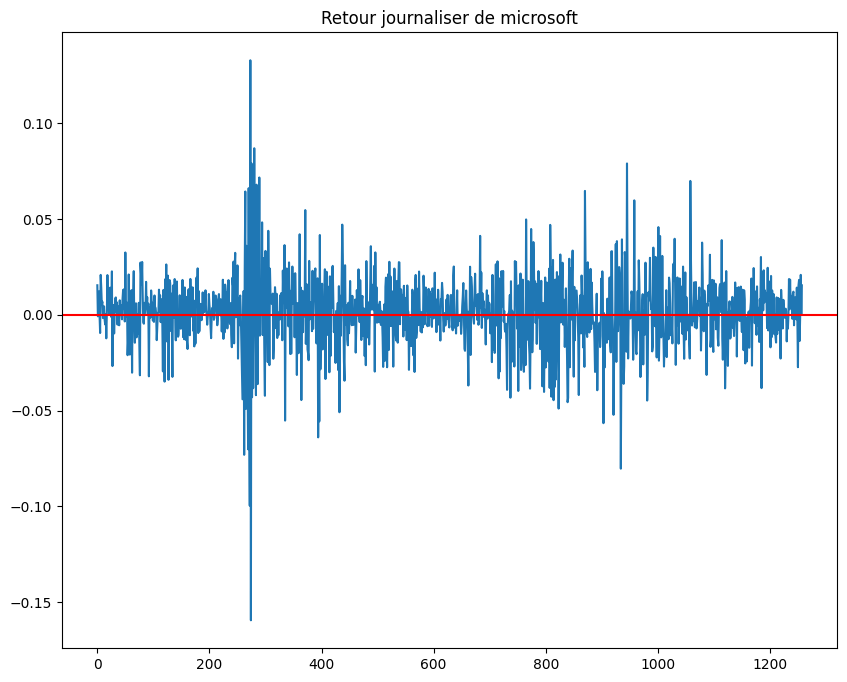

In [ ]:
# microsoft
plt.figure(figsize=(10, 8))
plt.plot(ms['logreturn'])
plt.axhline(y = 0, color = 'red')
plt.title('Retour journaliser de microsoft')

Text(0.5, 1.0, 'Retour journaliser de Apple')

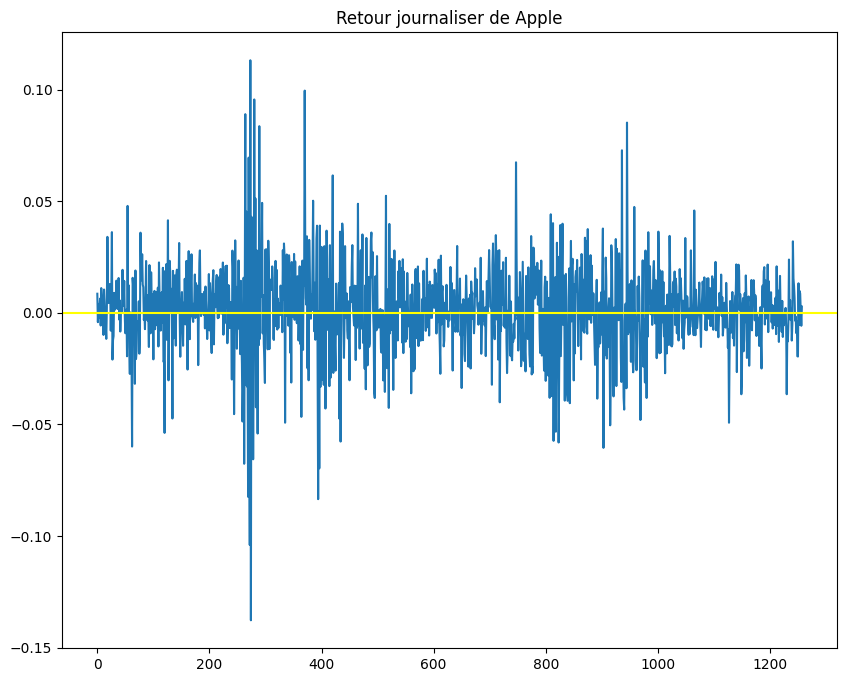

In [ ]:
# apple
plt.figure(figsize=(10, 8))
plt.plot(app['logreturn'])
plt.axhline(y = 0, color = 'yellow')
plt.title('Retour journaliser de Apple')

Text(0.5, 1.0, 'Retour journaliser de google')

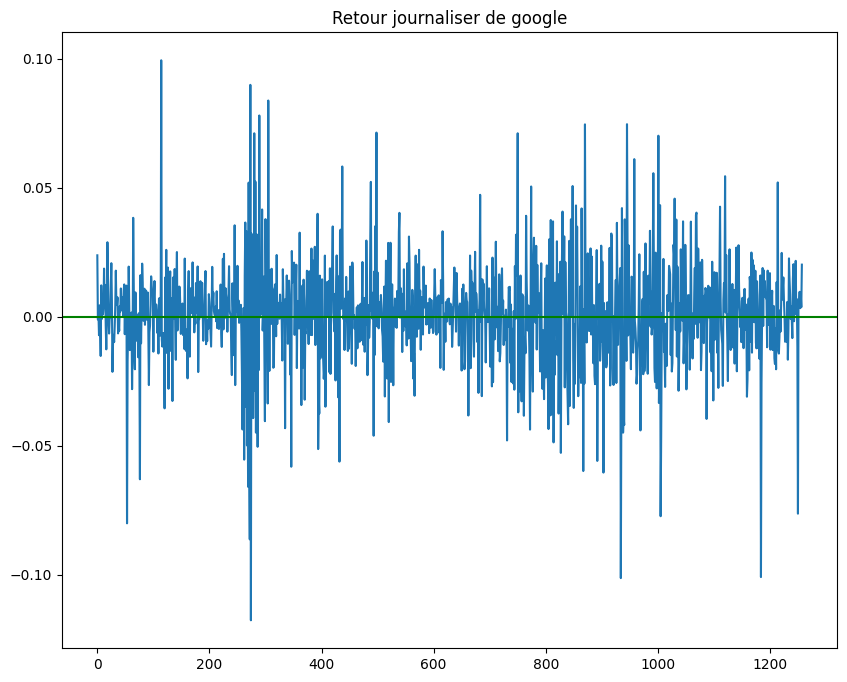

In [ ]:
# google
plt.figure(figsize=(10, 8))
plt.plot(goog['logreturn'])
plt.axhline(y = 0, color = 'green')
plt.title('Retour journaliser de google')

Le retour du journalier pour les trois actions augmente et diminue au cours de la période.